In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random

In [2]:
n_city = 150
x = np.random.rand(n_city)*10
y = np.random.rand(n_city)*10
xy = np.column_stack([x, y])
d_matrix = cdist(xy, xy)

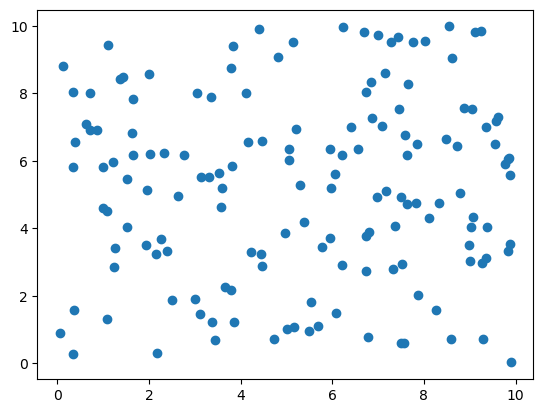

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
# Step 1: Initialize
n_iter = 1000
T = np.sqrt(2)*1000
alpha = 0.01
path = [0] + random.sample(range(1, n_city), n_city-1)
L = 0
for i in range(0, len(path)-1):
    L += d_matrix[(path[i], path[i+1])]

# Step 2: Tentative Permutation
T_list = []
p_list = []
dL_list = []
L_list = []
path_list = []

L_min = 0

for iter in range(n_iter):
    path_ = [0] + random.sample(range(1, n_city), n_city-1)
    L_ = 0
    for i in range(0, len(path_)-1):
        L_ += d_matrix[(path_[i], path_[i+1])]

    delta_L = L - L_

    # Step 3: Metropolis Function
    if delta_L > 0:
        p = np.exp(-delta_L/T)
        r = random.randint(0, 1)
        if r < p:
            path = path_
            L = L_
            path_list.append(path)
            L_list.append(L)    
            p_list.append(p)
    elif delta_L <= 0:
        path = path_
        L = L_
        path_list.append(path)
        L_list.append(L)  
        
    T = T - alpha*T
    
    T_list.append(T)
    dL_list.append(delta_L)

701


Text(0.5, 1.0, 'Delta_L')

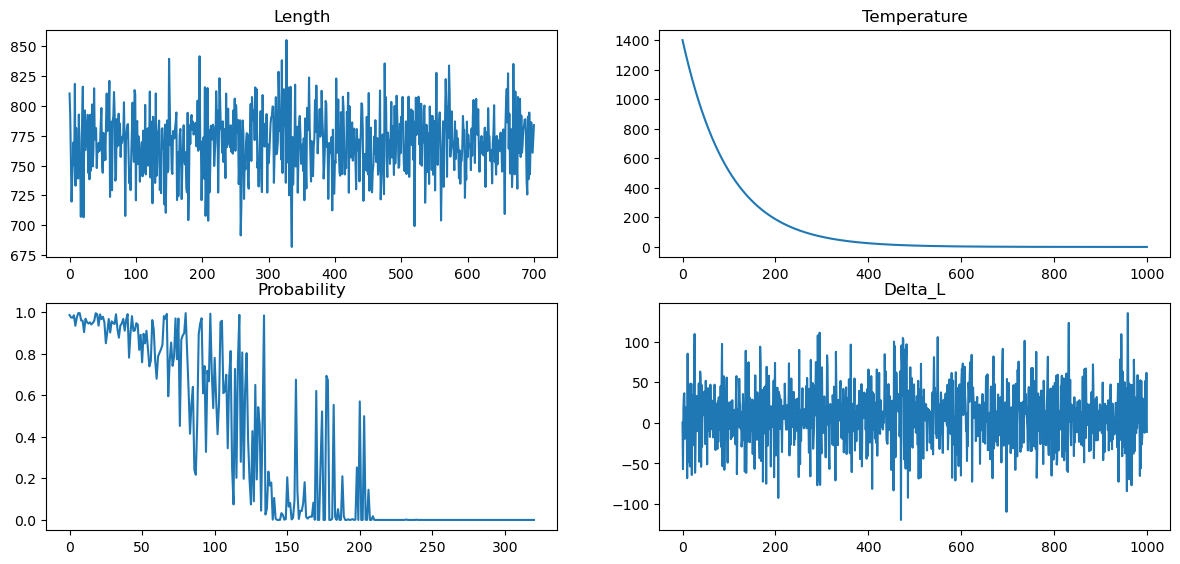

In [5]:
iteration = [x for x in range(0, len(L_list))]
print(len(L_list))
fig, axs = plt.subplots(2, 2, figsize = (14.5, 6.5))
axs[0, 0].plot(L_list)
axs[0, 0].set_title('Length')
axs[0, 1].plot(T_list)
axs[0, 1].set_title('Temperature')
axs[1, 0].plot(p_list)
axs[1, 0].set_title('Probability')
axs[1, 1].plot(dL_list)
axs[1, 1].set_title('Delta_L')